In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from sqlalchemy import create_engine
engine = create_engine("sqlite:///master_db.sqlite",echo=False)

In [2]:
exhist = pd.read_sql_query('select * from exhist',con=engine)

In [3]:
exhist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689982 entries, 0 to 689981
Data columns (total 13 columns):
extract_point            689982 non-null object
extraction_tons          689982 non-null int64
datestring               689982 non-null int64
total_extraction_tons    689982 non-null int64
reserves                 689982 non-null float64
region                   689982 non-null object
avg_sA                   689982 non-null float64
exhaustion               689982 non-null float64
zone                     689982 non-null object
sector                   689982 non-null object
daily_total_extracted    689982 non-null int64
ep_daily_pct             689982 non-null float64
ep_datestring            689982 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 68.4+ MB


In [4]:
date_month = []
date_year = []
datestrings = exhist.datestring.astype(str)
for i in range(len(datestrings)):
    date_month.append(datestrings[i][4:6])
    date_year.append(datestrings[i][:4])
exhist['month'] = date_month
exhist['year'] = date_year
exhist['year_month'] = exhist['year']+exhist['month']
exhist.head()

,extract_point,extraction_tons,datestring,total_extraction_tons,reserves,region,avg_sA,exhaustion,zone,sector,daily_total_extracted,ep_daily_pct,ep_datestring,month,year,year_month
0,611703,405,20151231,405,76860.0,7700SW,0.202857,0.526932,611,703,34288,1.181171,61170320151231,12,2015,201512
1,611703,424,20160105,829,76860.0,7700SW,0.202857,1.078584,611,703,28457,1.489967,61170320160105,01,2016,201601
2,611703,463,20160128,1292,76860.0,7700SW,0.202857,1.680978,611,703,22431,2.064108,61170320160128,01,2016,201601
3,611703,81,20160223,1373,76860.0,7700SW,0.202857,1.786365,611,703,20923,0.387134,61170320160223,02,2016,201602
4,611703,54,20160224,1427,76860.0,7700SW,0.202857,1.856622,611,703,20941,0.257867,61170320160224,02,2016,201602


In [5]:
ep_region = []
for i in range(len(exhist)):
    if exhist['region'][i] == '7210A':
        ep_region.append('rU')
    elif exhist['region'][i] == '7210M':
        ep_region.append('rV')
    elif exhist['region'][i] == '7210N':
        ep_region.append('rW')
    elif exhist['region'][i] == '7700NW':
        ep_region.append('rY')
    elif exhist['region'][i] == '7700SW':
        ep_region.append('rZ')
    else:
        ep_region.append('rX')
len(ep_region)

689982

In [6]:
exhist['ep_region'] = ep_region
exhist.head()

,extract_point,extraction_tons,datestring,total_extraction_tons,reserves,region,avg_sA,exhaustion,zone,sector,daily_total_extracted,ep_daily_pct,ep_datestring,month,year,year_month,ep_region
0,611703,405,20151231,405,76860.0,7700SW,0.202857,0.526932,611,703,34288,1.181171,61170320151231,12,2015,201512,rZ
1,611703,424,20160105,829,76860.0,7700SW,0.202857,1.078584,611,703,28457,1.489967,61170320160105,01,2016,201601,rZ
2,611703,463,20160128,1292,76860.0,7700SW,0.202857,1.680978,611,703,22431,2.064108,61170320160128,01,2016,201601,rZ
3,611703,81,20160223,1373,76860.0,7700SW,0.202857,1.786365,611,703,20923,0.387134,61170320160223,02,2016,201602,rZ
4,611703,54,20160224,1427,76860.0,7700SW,0.202857,1.856622,611,703,20941,0.257867,61170320160224,02,2016,201602,rZ


In [7]:
# adding wtd averages for summations in grouping
exhist['average_exhaustion'] = exhist['exhaustion']*exhist['extraction_tons']/exhist['daily_total_extracted']
exhist['average_sA'] = exhist['avg_sA']*exhist['extraction_tons']/exhist['daily_total_extracted']

In [8]:
def ep_daily_agg(x):
    column_names = {
        'total_extracted': x['extraction_tons'].sum(),
        'number_extract_points': x['ep_datestring'].count(),
        'average_exhaustion': x['average_exhaustion'].sum(),
        'average_sA': x['average_sA'].sum(),
        'average_percent_extracted_per_point': x['ep_daily_pct'].mean()
    }
    return pd.Series(column_names,index=['total_extracted','number_extract_points','average_exhaustion','average_sA','average_percent_extracted_per_point'])
daily_df = exhist.groupby('datestring').apply(ep_daily_agg).reset_index(drop=False)
daily_df

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000
...,...,...,...,...,...,...
4856,20200401,24015.0,201.0,88.742560,0.185467,0.497512
4857,20200402,20823.0,191.0,88.294063,0.187480,0.523560
4858,20200403,22208.0,183.0,87.768005,0.190363,0.546448
4859,20200406,21967.0,177.0,87.789035,0.186220,0.564972


In [9]:
date_month2 = []
date_year2 = []
datestrings2 = daily_df.datestring.astype(str)
for i in range(len(datestrings2)):
    date_month2.append(datestrings2[i][4:6])
    date_year2.append(datestrings2[i][:4])
daily_df['month'] = date_month2
daily_df['year'] = date_year2
daily_df['year_month'] = daily_df['year']+daily_df['month']
daily_df

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,month,year,year_month
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000,06,2001,200106
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024,06,2001,200106
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138,06,2001,200106
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852,06,2001,200106
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000,06,2001,200106
...,...,...,...,...,...,...,...,...,...
4856,20200401,24015.0,201.0,88.742560,0.185467,0.497512,04,2020,202004
4857,20200402,20823.0,191.0,88.294063,0.187480,0.523560,04,2020,202004
4858,20200403,22208.0,183.0,87.768005,0.190363,0.546448,04,2020,202004
4859,20200406,21967.0,177.0,87.789035,0.186220,0.564972,04,2020,202004


In [10]:
monthly_df = daily_df.groupby('year_month').mean()
monthly_df = monthly_df.drop(columns={'datestring'})
monthly_df

,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point
year_month,,,,,
200106,24282.000000,32.823529,2.263424,0.202696,6.190463
200107,23310.875000,29.437500,4.863413,0.200524,17.024241
200108,22716.625000,58.750000,8.820039,0.193687,3.122817
200109,21996.894737,77.210526,12.339667,0.199420,1.460313
200110,21640.130435,76.304348,15.530007,0.208329,1.403304
...,...,...,...,...,...
201912,13234.357143,94.857143,98.231137,0.184536,1.208324
202001,20024.200000,114.266667,95.303671,0.182888,0.895536
202002,19642.714286,121.928571,99.560971,0.174601,0.927806


In [11]:
run_days = exhist.groupby('year_month')['datestring'].nunique()
monthly_df['run_days'] = run_days
monthly_df['average_extracted_per_day'] = (monthly_df['total_extracted']/monthly_df['run_days'])
monthly_df = monthly_df.round({'total_extracted':0,'number_extract_points':0,'average_exhaustion':2,
                              'average_sA':3,'average_percent_extracted_per_point':2,
                              'average_extracted_per_day':0})
monthly_df.reset_index(level=0,inplace=True)
monthly_df

,year_month,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day
0,200106,24282.0,33.0,2.26,0.203,6.19,17,1428.0
1,200107,23311.0,29.0,4.86,0.201,17.02,16,1457.0
2,200108,22717.0,59.0,8.82,0.194,3.12,16,1420.0
3,200109,21997.0,77.0,12.34,0.199,1.46,19,1158.0
4,200110,21640.0,76.0,15.53,0.208,1.40,23,941.0
...,...,...,...,...,...,...,...,...
222,201912,13234.0,95.0,98.23,0.185,1.21,14,945.0
223,202001,20024.0,114.0,95.30,0.183,0.90,15,1335.0
224,202002,19643.0,122.0,99.56,0.175,0.93,14,1403.0
225,202003,23802.0,146.0,95.02,0.184,0.71,16,1488.0


In [12]:
# Import assay data
daily_assays = pd.read_csv('../Data-Analytics-Final_Project/Resources/daily_assays.csv')
month_actuals = pd.read_csv('../Data-Analytics-Final_Project/Resources/month_actuals.csv')

In [13]:
monthly_df['year_month'] = monthly_df['year_month'].astype(int)
monthly_data = month_actuals.merge(monthly_df,on='year_month')
monthly_data

,year_month,actual_pA,month,year,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day
0,200106,0.187,6,2001,24282.0,33.0,2.26,0.203,6.19,17,1428.0
1,200107,0.178,7,2001,23311.0,29.0,4.86,0.201,17.02,16,1457.0
2,200108,0.194,8,2001,22717.0,59.0,8.82,0.194,3.12,16,1420.0
3,200109,0.202,9,2001,21997.0,77.0,12.34,0.199,1.46,19,1158.0
4,200110,0.190,10,2001,21640.0,76.0,15.53,0.208,1.40,23,941.0
...,...,...,...,...,...,...,...,...,...,...,...
220,201911,0.128,11,2019,14984.0,106.0,90.60,0.180,1.16,16,936.0
221,201912,0.137,12,2019,13234.0,95.0,98.23,0.185,1.21,14,945.0
222,202001,0.141,1,2020,20024.0,114.0,95.30,0.183,0.90,15,1335.0
223,202002,0.150,2,2020,19643.0,122.0,99.56,0.175,0.93,14,1403.0


In [14]:
daily_assays

,date,pA,pB,pD,pC,month,year,year_month,day,datestring
0,6/1/2001,0.184,NaN,NaN,NaN,6,2001,200106,1,20010601
1,6/2/2001,0.182,NaN,NaN,NaN,6,2001,200106,2,20010602
2,6/4/2001,0.177,NaN,NaN,NaN,6,2001,200106,4,20010604
3,6/5/2001,0.195,NaN,NaN,NaN,6,2001,200106,5,20010605
4,6/6/2001,0.180,NaN,NaN,NaN,6,2001,200106,6,20010606
...,...,...,...,...,...,...,...,...,...,...
4699,3/20/2020,0.134,2.459333,0.009750,0.001925,3,2020,202003,20,20200320
4700,3/23/2020,0.143,2.603000,0.012000,0.001800,3,2020,202003,23,20200323
4701,3/24/2020,0.140,2.641500,0.011667,0.001933,3,2020,202003,24,20200324
4702,3/25/2020,0.149,2.673500,0.012333,0.001800,3,2020,202003,25,20200325


In [15]:
month_contaminants = daily_assays.groupby('year_month').mean()
month_contaminants = month_contaminants.drop(columns={'pA','month','year','day','datestring'})
month_contaminants = month_contaminants.rename(columns={'pB':'average_pB','pD':'average_pD','pC':'average_pC'})
month_contaminants

,average_pB,average_pD,average_pC
year_month,,,
200106,NaN,NaN,NaN
200107,NaN,NaN,NaN
200108,NaN,NaN,NaN
200109,NaN,NaN,NaN
200110,NaN,NaN,NaN
...,...,...,...
201911,2.651545,0.007970,0.001930
201912,2.864889,0.008481,0.002070
202001,2.975722,0.009533,0.002242


In [16]:
monthly_assays = month_actuals.merge(month_contaminants,on='year_month',how='left')

In [17]:
monthly_assays

,year_month,actual_pA,month,year,average_pB,average_pD,average_pC
0,200106,0.187,6,2001,NaN,NaN,NaN
1,200107,0.178,7,2001,NaN,NaN,NaN
2,200108,0.194,8,2001,NaN,NaN,NaN
3,200109,0.202,9,2001,NaN,NaN,NaN
4,200110,0.190,10,2001,NaN,NaN,NaN
...,...,...,...,...,...,...,...
220,201911,0.128,11,2019,2.651545,0.007970,0.001930
221,201912,0.137,12,2019,2.864889,0.008481,0.002070
222,202001,0.141,1,2020,2.975722,0.009533,0.002242
223,202002,0.150,2,2020,2.801782,0.010231,0.001921


In [18]:
# Current Dataframes and uses
# daily_df for production data on a daily scope
# monthly_data for production data on a monthly scope
# daily_assays for assays available on daily scope
# monthly_assays for assays available on monthly scope
# still need to combine them and split into zone and region for regressions, will start with full data first
# using a left merge on assay data, for pA, to remove dates that have no data available
# need pA for all values since it is a major part of outputs, pB, pC, pD are not going to be as available

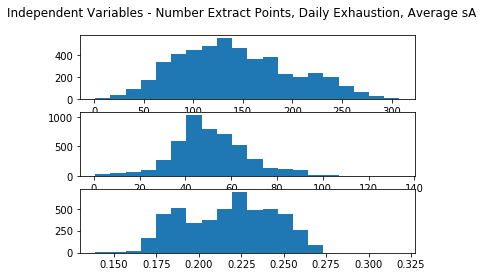

In [19]:
# Plotting Independent variables to see data structure
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Independent Variables - Number Extract Points, Daily Exhaustion, Average sA')
ax1.hist(daily_df.number_extract_points, bins=20)
ax2.hist(daily_df.average_exhaustion, bins=20)
ax3.hist(daily_df.average_sA, bins=20)
plt.show()
# Independent variables are relatively normally distributed

C:\Users\Adrianna\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Adrianna\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


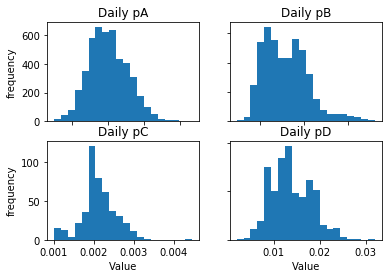

In [20]:
fig, axs = plt.subplots(2,2)
axs[0,0].hist(daily_assays['pA'],bins=20)
axs[0,0].set_title('Daily pA')
axs[0,1].hist(daily_assays['pB'],bins=20)
axs[0,1].set_title('Daily pB')
axs[1,0].hist(daily_assays['pC'],bins=20)
axs[1,0].set_title('Daily pC')
axs[1,1].hist(daily_assays['pD'],bins=20)
axs[1,1].set_title('Daily pD')

for ax in axs.flat:
    ax.set(xlabel='Value', ylabel='frequency')
for ax in axs.flat:
    ax.label_outer()
plt.show()
# Similar to independent values, dependent values are roughly normal as well

In [21]:
# Create dataframes for each output for daily and monthly
daily_composite = daily_df.merge(daily_assays,on='datestring')
daily_composite

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,month_x,year_x,year_month_x,date,pA,pB,pD,pC,month_y,year_y,year_month_y,day
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000,06,2001,200106,6/2/2001,0.182,NaN,NaN,NaN,6,2001,200106,2
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024,06,2001,200106,6/4/2001,0.177,NaN,NaN,NaN,6,2001,200106,4
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138,06,2001,200106,6/5/2001,0.195,NaN,NaN,NaN,6,2001,200106,5
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852,06,2001,200106,6/6/2001,0.180,NaN,NaN,NaN,6,2001,200106,6
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000,06,2001,200106,6/7/2001,0.191,NaN,NaN,NaN,6,2001,200106,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628,20200320,18527.0,150.0,91.697606,0.189014,0.666667,03,2020,202003,3/20/2020,0.134,2.459333,0.009750,0.001925,3,2020,202003,20
4629,20200323,22050.0,163.0,92.262835,0.183232,0.613497,03,2020,202003,3/23/2020,0.143,2.603000,0.012000,0.001800,3,2020,202003,23
4630,20200324,24221.0,177.0,91.541995,0.187317,0.564972,03,2020,202003,3/24/2020,0.140,2.641500,0.011667,0.001933,3,2020,202003,24
4631,20200325,22649.0,174.0,80.328178,0.193251,0.574713,03,2020,202003,3/25/2020,0.149,2.673500,0.012333,0.001800,3,2020,202003,25


In [22]:
daily_composite = daily_composite.drop(columns={'month_x','year_x','year_month_x','month_y','year_y','year_month_y','day'})
daily_composite

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,date,pA,pB,pD,pC
0,20010602,3050.0,4.0,0.763969,0.198464,25.000000,6/2/2001,0.182,NaN,NaN,NaN
1,20010604,23217.0,41.0,0.810689,0.177191,2.439024,6/4/2001,0.177,NaN,NaN,NaN
2,20010605,46802.0,58.0,1.398749,0.209976,1.724138,6/5/2001,0.195,NaN,NaN,NaN
3,20010606,45967.0,54.0,1.185720,0.220088,1.851852,6/6/2001,0.180,NaN,NaN,NaN
4,20010607,7310.0,20.0,0.554372,0.168266,5.000000,6/7/2001,0.191,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4628,20200320,18527.0,150.0,91.697606,0.189014,0.666667,3/20/2020,0.134,2.459333,0.009750,0.001925
4629,20200323,22050.0,163.0,92.262835,0.183232,0.613497,3/23/2020,0.143,2.603000,0.012000,0.001800
4630,20200324,24221.0,177.0,91.541995,0.187317,0.564972,3/24/2020,0.140,2.641500,0.011667,0.001933
4631,20200325,22649.0,174.0,80.328178,0.193251,0.574713,3/25/2020,0.149,2.673500,0.012333,0.001800


In [23]:
monthly_composite = monthly_data.merge(monthly_assays,on='year_month')
monthly_composite

,year_month,actual_pA_x,month_x,year_x,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day,actual_pA_y,month_y,year_y,average_pB,average_pD,average_pC
0,200106,0.187,6,2001,24282.0,33.0,2.26,0.203,6.19,17,1428.0,0.187,6,2001,NaN,NaN,NaN
1,200107,0.178,7,2001,23311.0,29.0,4.86,0.201,17.02,16,1457.0,0.178,7,2001,NaN,NaN,NaN
2,200108,0.194,8,2001,22717.0,59.0,8.82,0.194,3.12,16,1420.0,0.194,8,2001,NaN,NaN,NaN
3,200109,0.202,9,2001,21997.0,77.0,12.34,0.199,1.46,19,1158.0,0.202,9,2001,NaN,NaN,NaN
4,200110,0.190,10,2001,21640.0,76.0,15.53,0.208,1.40,23,941.0,0.190,10,2001,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,201911,0.128,11,2019,14984.0,106.0,90.60,0.180,1.16,16,936.0,0.128,11,2019,2.651545,0.007970,0.001930
221,201912,0.137,12,2019,13234.0,95.0,98.23,0.185,1.21,14,945.0,0.137,12,2019,2.864889,0.008481,0.002070
222,202001,0.141,1,2020,20024.0,114.0,95.30,0.183,0.90,15,1335.0,0.141,1,2020,2.975722,0.009533,0.002242
223,202002,0.150,2,2020,19643.0,122.0,99.56,0.175,0.93,14,1403.0,0.150,2,2020,2.801782,0.010231,0.001921


In [24]:
monthly_composite = monthly_composite.drop(columns={'actual_pA_x','month_x','year_x','month_y','year_y'})
monthly_composite = monthly_composite.rename(columns={'actual_pA_y':'average_pA'})
monthly_composite

,year_month,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,run_days,average_extracted_per_day,average_pA,average_pB,average_pD,average_pC
0,200106,24282.0,33.0,2.26,0.203,6.19,17,1428.0,0.187,NaN,NaN,NaN
1,200107,23311.0,29.0,4.86,0.201,17.02,16,1457.0,0.178,NaN,NaN,NaN
2,200108,22717.0,59.0,8.82,0.194,3.12,16,1420.0,0.194,NaN,NaN,NaN
3,200109,21997.0,77.0,12.34,0.199,1.46,19,1158.0,0.202,NaN,NaN,NaN
4,200110,21640.0,76.0,15.53,0.208,1.40,23,941.0,0.190,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
220,201911,14984.0,106.0,90.60,0.180,1.16,16,936.0,0.128,2.651545,0.007970,0.001930
221,201912,13234.0,95.0,98.23,0.185,1.21,14,945.0,0.137,2.864889,0.008481,0.002070
222,202001,20024.0,114.0,95.30,0.183,0.90,15,1335.0,0.141,2.975722,0.009533,0.002242
223,202002,19643.0,122.0,99.56,0.175,0.93,14,1403.0,0.150,2.801782,0.010231,0.001921


In [25]:
# Export Daily and Monthly data for modeling in R
daily_composite.to_csv('../Data-Analytics-Final_Project/Resources/daily_composite.csv',index=False)
monthly_composite.to_csv('../Data-Analytics-Final_Project/Resources/monthly_composite.csv',index=False)

In [26]:
daily_composite.describe()

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,pA,pB,pD,pC
count,4.633000e+03,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,4633.000000,2334.000000,2335.000000,455.000000
mean,2.009755e+07,26807.236564,143.881718,50.999685,0.217831,0.892768,0.200107,1.598983,0.013849,0.002131
std,5.124526e+04,8374.797400,56.875430,16.172041,0.026429,1.685878,0.026830,0.507720,0.004409,0.000431
min,2.001060e+07,255.000000,1.000000,0.554372,0.145362,0.324675,0.125000,0.476000,0.002000,0.001000
25%,2.005120e+07,20934.000000,102.000000,41.604887,0.194090,0.552486,0.181000,1.189250,0.010333,0.001933
50%,2.009102e+07,27064.000000,138.000000,49.431510,0.220704,0.724638,0.198000,1.538833,0.013333,0.002100
75%,2.014043e+07,32820.000000,181.000000,60.203520,0.238989,0.980392,0.218000,1.920000,0.017000,0.002350
max,2.020033e+07,138455.000000,308.000000,125.648341,0.287335,100.000000,0.317000,3.616667,0.032000,0.004467


In [27]:
daily_composite.tail(50)

,datestring,total_extracted,number_extract_points,average_exhaustion,average_sA,average_percent_extracted_per_point,date,pA,pB,pD,pC
4583,20191210,18544.0,117.0,106.874313,0.184223,0.854701,12/10/2019,0.173,2.845333,0.007667,0.002000
4584,20191211,16205.0,111.0,103.247984,0.183520,0.900901,12/11/2019,0.187,3.166000,0.008333,0.002167
4585,20191212,16339.0,108.0,100.311862,0.181633,0.925926,12/12/2019,0.187,3.202500,0.008333,0.002033
4586,20191216,15763.0,103.0,97.180784,0.181602,0.970874,12/16/2019,0.188,2.909000,0.009333,0.002167
4587,20191217,16456.0,126.0,91.729110,0.185111,0.793651,12/17/2019,0.209,2.602000,0.010000,0.001933
4588,20191218,17167.0,101.0,102.768747,0.179395,0.990099,12/18/2019,0.199,2.751000,0.008333,0.002167
4589,20200107,14465.0,83.0,99.809452,0.174515,1.204819,1/7/2020,0.198,2.445000,0.008333,0.001900
4590,20200108,18378.0,112.0,99.058071,0.172396,0.892857,1/8/2020,0.175,2.856000,0.007333,0.002000
4591,20200109,19569.0,114.0,99.543187,0.183486,0.877193,1/9/2020,0.195,3.136000,0.008667,0.002267
4592,20200110,23216.0,120.0,93.834844,0.187113,0.833333,1/10/2020,0.199,3.383000,0.009000,0.002933
